In [32]:
import pandas as pd
import numpy as np 
from numpy import random
import nltk, re

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import seaborn as sns
from nltk.corpus import stopwords
from sklearn.preprocessing import OneHotEncoder

from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Dense, Dropout, LSTM, Dropout, Bidirectional

from sentence_transformers import SentenceTransformer

In [24]:
sbert_model = SentenceTransformer('bert-base-nli-mean-tokens')

In [17]:
df = pd.read_csv('stock_data.csv')

In [18]:
df.head()

,Text,Sentiment
0,Kickers on my watchlist XIDE TIT SOQ PNK CPW B...,1
1,user: AAP MOVIE. 55% return for the FEA/GEED i...,1
2,user I'd be afraid to short AMZN - they are lo...,1
3,MNTA Over 12.00,1
4,OI Over 21.37,1


<AxesSubplot:xlabel='Sentiment', ylabel='count'>

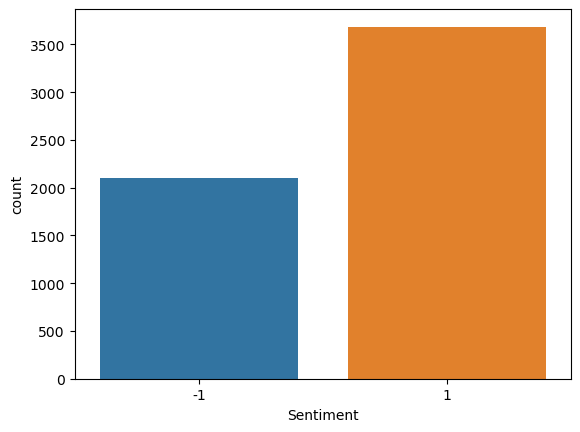

In [20]:
sns.countplot(x ='Sentiment', data = df)

In [21]:
ix = list(range(df.shape[0]))
ix = random.permutation(ix)

In [27]:
%%time
div = int(df.shape[0] * 0.7)
train_df = df.iloc[ix[0:div]]
corpus_train = train_df[['Text']]

test_df = df.iloc[ix[div:]]
corpus_test = test_df[['Text']]

CPU times: user 8.49 ms, sys: 168 µs, total: 8.66 ms
Wall time: 7.45 ms


In [29]:
%%time
corpus_train_enc = sbert_model.encode(corpus_train['Text'].values)

CPU times: user 8min 34s, sys: 3.63 s, total: 8min 38s
Wall time: 4min 21s


In [30]:
corpus_train_enc.shape

(4053, 768)

In [33]:
maxlen = 768
X_train_padded = keras.preprocessing.sequence.pad_sequences(corpus_train_enc, maxlen=maxlen, padding='post')
#X_test_padded = keras.preprocessing.sequence.pad_sequences(X_test, maxlen=maxlen, padding='post')

In [213]:
input_dim = 768
output_dim = 64

model = Sequential()

model.add(LSTM(output_dim, input_shape = (1, input_dim)))

model.add(Bidirectional(LSTM(output_dim)))
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

ValueError: Input 0 of layer "bidirectional_48" is incompatible with the layer: expected ndim=3, found ndim=2. Full shape received: (None, 64)

In [208]:
encoder = OneHotEncoder(sparse=False)
y_train_encoded = encoder.fit_transform(np.array(train_df['Sentiment']).reshape(-1, 1))

In [209]:
print(X_train_padded.shape)
print(y_train_encoded.shape)

(4053, 768)
(4053, 2)


In [210]:
X_train_padded = pd.DataFrame(X_train_padded)

In [211]:
model.fit(X_train_padded, y_train_encoded, batch_size=128, epochs=5)

Epoch 1/5


ValueError: in user code:

    File "/home/ashish/anaconda3/envs/stock_market_prediction/lib/python3.10/site-packages/keras/engine/training.py", line 1051, in train_function  *
        return step_function(self, iterator)
    File "/home/ashish/anaconda3/envs/stock_market_prediction/lib/python3.10/site-packages/keras/engine/training.py", line 1040, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/home/ashish/anaconda3/envs/stock_market_prediction/lib/python3.10/site-packages/keras/engine/training.py", line 1030, in run_step  **
        outputs = model.train_step(data)
    File "/home/ashish/anaconda3/envs/stock_market_prediction/lib/python3.10/site-packages/keras/engine/training.py", line 889, in train_step
        y_pred = self(x, training=True)
    File "/home/ashish/anaconda3/envs/stock_market_prediction/lib/python3.10/site-packages/keras/utils/traceback_utils.py", line 67, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/home/ashish/anaconda3/envs/stock_market_prediction/lib/python3.10/site-packages/keras/engine/input_spec.py", line 214, in assert_input_compatibility
        raise ValueError(f'Input {input_index} of layer "{layer_name}" '

    ValueError: Exception encountered when calling layer "sequential_42" (type Sequential).
    
    Input 0 of layer "bidirectional_46" is incompatible with the layer: expected ndim=3, found ndim=2. Full shape received: (None, 768)
    
    Call arguments received by layer "sequential_42" (type Sequential):
      • inputs=tf.Tensor(shape=(None, 768), dtype=int32)
      • training=True
      • mask=None
